In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./input/data-shogi-player.txt')
data.head()

,Loser,Winner
0,22,83
1,39,27
2,47,105
3,1,7
4,45,81


In [3]:
data.groupby('Winner').count()

,Loser
Winner,
1,12
2,9
3,15
4,22
5,5
6,14
7,3
8,4
9,5


In [4]:
stan_model = """

data {
  int N;
  int G;
  int<lower=1, upper=N> LW[G, 2];
}


parameters {
  ordered[2] performance[G];
  vector[N] mu;
  real<lower=0> s_mu;
  vector<lower=0>[N] s_pf;
}

model {
  for (g in 1:G){
    for (i in 1:2){
      performance[g, i] ~ normal(mu[LW[g, i]], s_pf[LW[g, i]]);
    }
  }
  
  mu ~ normal(0, s_mu);
  s_pf ~ gamma(10, 10);
  
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0b6e089bd12dcb75828601ee00a78fbe NOW.


In [6]:
stan_data = {}
stan_data['N'] = 166
stan_data['G'] = data.shape[0]
stan_data['LW'] = data

In [7]:
fit = sm.sampling(stan_data)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [8]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_0b6e089bd12dcb75828601ee00a78fbe.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                     mean se_mean     sd   2.5%    25%    50%     75%  97.5%  n_eff   Rhat
performance[1,1]    -0.31    0.02   0.86   -2.3   -0.8  -0.24    0.27   1.21   2020    1.0
performance[2,1]    -0.95    0.02    1.0  -3.19  -1.54  -0.86   -0.29   0.84   2616    1.0
performance[3,1]     1.31    0.02    0.8  -0.45   0.86   1.35    1.82   2.82   2575    1.0
performance[4,1]    -1.87    0.02   0.85  -3.77  -2.36   -1.8   -1.29  -0.34   1636    1.0
performance[5,1]    -0.65    0.02   0.94  -2.79   -1.2  -0.56   -0.02   0.99   3073    1.0
performance[6,1]     0.11    0.02   0.84  -1.85  -0.36   0.19    0.68   1.59   1907    1.0
performance[7,1]    -0.32    0.02   0.95  -2.38  -0.89  -0.25    0.33   1.33   1672    1.0
performance[8,1]    -0.69    0.02    1.1  -

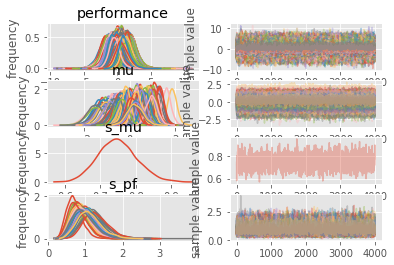

In [9]:
fig = fit.plot()

In [10]:
sample_s_mu = fit.extract('mu')['mu']
sample_s_pf = fit.extract('s_pf')['s_pf']

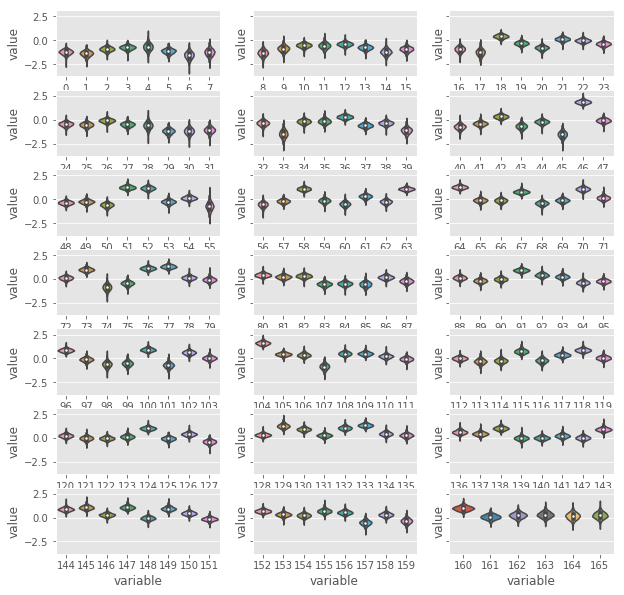

In [11]:
#166 = 2 * 83 = -2 + 2 * 84 = -2 + 8 * 21 

n_show = 8
n_plot_row = 7
n_plot_col = 3

fig, axes = plt.subplots(n_plot_row, n_plot_col, figsize=(10, 10), sharey=True)

for i in range(n_plot_row * n_plot_col):
    plot_r= i // n_plot_col
    plot_c = i % n_plot_col
    ax = axes[plot_r, plot_c]
    offset = i * n_show
    sns.violinplot(data=pd.DataFrame(sample_s_mu).iloc[:,offset:(offset+n_show)].melt(), x='variable', y ='value', ax=ax)

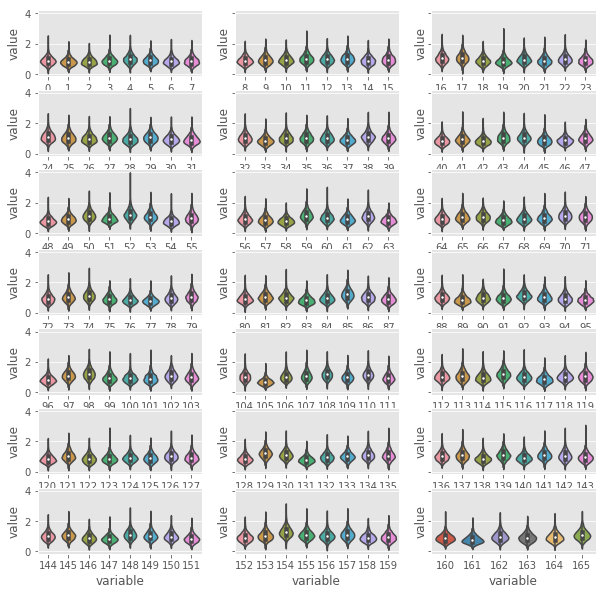

In [12]:
#166 = 2 * 83 = -2 + 2 * 84 = -2 + 8 * 21 

n_show = 8
n_plot_row = 7
n_plot_col = 3

fig, axes = plt.subplots(n_plot_row, n_plot_col, figsize=(10, 10), sharey=True)

for i in range(n_plot_row * n_plot_col):
    plot_r= i // n_plot_col
    plot_c = i % n_plot_col
    ax = axes[plot_r, plot_c]
    offset = i * n_show
    sns.violinplot(data=pd.DataFrame(sample_s_pf).iloc[:,offset:(offset+n_show)].melt(), x='variable', y ='value', ax=ax)